# 水泥行业上市公司经营业绩因子模型实证分析

In [32]:
### Name: factpc

### Aliases: factpc
### Keywords: ~kwd1 ~kwd2

### ** Examples

##---- Should be DIRECTLY executable !! ----
##-- ==>  Define data, use random,
##--    or do  help(data=index)  for the standard data sets.

## The function is currently defined as
factpc<-function(X, m=2,rotation="none",scores="regression")
{  
   options(digits=4)
   S=cor(X); 
   p<-nrow(S); diag_S<-diag(S); sum_rank<-sum(diag_S)
   #rowname<-paste("X", 1:p, sep="")
   rowname = names(X)
   colname<-paste("Factor", 1:p, sep="")
   A<-matrix(0, nrow=p, ncol=p, dimnames=list(rowname, colname))
   eig<-eigen(S)
   for (i in 1:p)
      A[,i]<-sqrt(eig$values[i])*eig$vectors[,i]
   for (i in 1:p) { if(sum(A[,i])<0) A[,i] = -A[,i] }
   h<-diag(A%*%t(A))
   rowname<-c("SS loadings", "Proportion Var", "Cumulative Var")
   B<-matrix(0, nrow=3, ncol=p, dimnames=list(rowname, colname))
   for (i in 1:p){
     B[1,i]<-sum(A[,i]^2)
     B[2,i]<-B[1,i]/sum_rank
     B[3,i]<-sum(B[1,1:i])/sum_rank
   }
   #cat("\nFactor Analysis for Princomp: \n\n");
   #cat("\n"); print(B[,1:m]);
   W=B[2,1:m]*100; 
   Vars=cbind('Vars'=B[1,],'Vars.Prop'=B[2,],'Vars.Cum'=B[3,]*100)
   #cat("\n"); print(Vars[1:m,])
   #cat("\n"); print(A[,1:m]);
   A=A[,1:m] 
   #{ cat("\n common and specific \n"); print(cbind(common=h, spcific=diag_S-h)); }
   if(rotation=="varimax")
   {   
       #stop(" factor number >= 2 !")
       cat("\n Factor Analysis for Princomp in Varimax: \n\n");
       VA=varimax(A); A=VA$loadings; 
       s2=apply(A^2,2,sum); 
       k=rank(-s2); s2=s2[k]; 
       W=s2/sum(B[1,])*100; 
       Vars=cbind('Vars'=s2,'Vars.Prop'=W,'Vars.Cum'=cumsum(W))
       rownames(Vars) <- paste("Factor", 1:m, sep="")
       #print(Vars[1:m,])
       A=A[,k]
       for (i in 1:m) { if(sum(A[,i])<0) A[,i] = -A[,i] }
       A=A[,1:m]; 
       colnames(A) <- paste("Factor", 1:m, sep="")
       #cat("\n"); print(A) 
   }
   fit<-NULL
   fit$Vars<-Vars[1:m,]
   fit$loadings <- A
   X=as.matrix(scale(X));
   PCs=X%*%solve(S)%*%A
   #if(scores) cat("\n"); print(PCs)
   fit$scores <- PCs
   #if(rank)
   { 
      W=W/sum(W);
      PC=PCs%*%W;
      #cat("\n"); print(cbind(PCs,'PC'=PC[,1],'rank'=rank(-PC[,1])))
      Ri=data.frame('F'=PC,'Ri'=rank(-PC))
      fit$Rank <- Ri
   }
   #if(plot)
   #{ plot(PCs);abline(h=0,v=0,lty=3); text(PCs,label=rownames(PCs),pos=1.1,adj=0.5,cex=0.85) }
   #if(biplot)
   #{ biplot(PCs,A) } #text(PCs,label=rownames(PCs),pos=1.1,adj=0.5,cex=0.85) 
   common=apply(A^2,1,sum);
   fit$common <- common
   fit
   #list(Vars=B[,1:m],loadings=A,scores=PCs,Ri=Ri,common=common)
} #fa=factpc(X,2)

In [25]:
X=read.table("d9_1.txt")
cor(X)

,x1,x2,x3,x4,x5,x6
x1,1.00000000,0.9991983,-0.09974689,0.18850763,0.2010041,0.29778271
x2,0.99919830,1.0000000,-0.10420434,0.19672979,0.1903570,0.28747808
x3,-0.09974689,-0.1042043,1.00000000,-0.83715637,-0.4087603,0.01518741
x4,0.18850763,0.1967298,-0.83715637,1.00000000,0.2585103,-0.02928244
x5,0.20100410,0.1903570,-0.40876032,0.25851029,1.0000000,0.58029333
x6,0.29778271,0.2874781,0.01518741,-0.02928244,0.5802933,1.00000000


从上面的相关矩阵可以看出，主营业务利润率$x_1$与销售毛利率$x_2$,呈高度正相关，速动比率$x_3$与资产负债率$x_4$呈较强的负相关，主营业务收入增长率$x_5$和营业利润增长率$x_6$呈中度相关。为了消除各财务指标之间的相关性，采用因子分析方法提取因子。

In [30]:
FA0=factanal(X,3,rot="none")
FA0


Call:
factanal(x = X, factors = 3, rotation = "none")

Uniquenesses:
   x1    x2    x3    x4    x5    x6 
0.005 0.005 0.005 0.271 0.005 0.548 

Loadings:
   Factor1 Factor2 Factor3
x1  0.950  -0.307         
x2  0.948  -0.310         
x3 -0.340  -0.782   0.517 
x4  0.363   0.561  -0.531 
x5  0.454   0.693   0.556 
x6  0.383   0.163   0.527 

               Factor1 Factor2 Factor3
SS loadings      2.402   1.623   1.140
Proportion Var   0.400   0.271   0.190
Cumulative Var   0.400   0.671   0.861

The degrees of freedom for the model is 0 and the fit was 1.1422 

In [33]:
(Fac=factpc(X, 3))

,Vars,Vars.Prop,Vars.Cum
Factor1,2.570,0.4283,42.83
Factor2,1.713,0.2855,71.38
Factor3,1.249,0.2082,92.19
,Factor1,Factor2,Factor3
x1,0.7829,0.5029,-0.3624
x2,0.7811,0.4964,-0.3756
x3,-0.5786,0.7685,0.0802
x4,0.5951,-0.6990,-0.2415
x5,0.6317,-0.1457,0.6557
x6,0.5084,0.3367,0.6943


由结果可以看出，前三个因子所解释的方差占整个方差的$86\%$以上，基本上能全面地反映六项财务指标的信息。所以我们提取前三个因子作为公共因子。但各因子的经济含义并不是很明显，还需进一步分析。从上面的结果可以看出，主因子法要比极大似然法的提取效果好些，因为极大似然法要求数据来自多元正态分布，这点一般是很难满足的。

In [34]:
FA1=factanal(X,3,rot="varimax") # varimax法旋转因子分析
FA1


Call:
factanal(x = X, factors = 3, rotation = "varimax")

Uniquenesses:
   x1    x2    x3    x4    x5    x6 
0.005 0.005 0.005 0.271 0.005 0.548 

Loadings:
   Factor1 Factor2 Factor3
x1  0.983           0.155 
x2  0.985           0.142 
x3         -0.990  -0.124 
x4  0.127   0.844         
x5          0.293   0.953 
x6  0.210           0.631 

               Factor1 Factor2 Factor3
SS loadings      1.998   1.800   1.367
Proportion Var   0.333   0.300   0.228
Cumulative Var   0.333   0.633   0.861

The degrees of freedom for the model is 0 and the fit was 1.1422 

可以采用回归估计法、Bartlett估计法等估计方法计算样本的因子得分。

In [35]:
# 使用回归估计法的极大似然法因子分析
Fa1=factanal(X,3,scores = "regression")
Fa1$scores

,Factor1,Factor2,Factor3
冀东水泥,1.0571,0.49858,-0.01932
大同水泥,0.2508,-1.97182,-0.55062
四川双马,-0.7619,0.61936,-0.35643
牡丹江,-1.2622,0.10831,-0.82490
西水股份,-1.4124,-0.36520,2.09840
狮头股份,0.2993,-2.28407,0.06540
太行股份,0.5368,-0.01725,-0.16548
海螺水泥,1.1383,0.86089,1.85549
尖峰集团,-1.7990,0.62143,-0.20236
四川金顶,0.4397,0.83905,-1.87521


In [36]:
# 使用回归估计法的主成分法因子分析
Fac1=factpc(X,3,scores = "regression")
Fac1$scores

,Factor1,Factor2,Factor3
冀东水泥,1.10805,0.19287,-0.40233
大同水泥,-1.07195,1.46385,-0.37413
四川双马,-0.58577,-0.49848,0.24193
牡丹江,-1.17442,-0.77791,0.08986
西水股份,-0.05264,-0.46073,2.31615
狮头股份,-1.05007,2.04151,0.25174
太行股份,0.20807,0.48809,-0.23430
海螺水泥,2.20745,0.32524,1.16336
尖峰集团,-1.11541,-1.53235,0.39013
四川金顶,0.09714,-0.60602,-1.45691


水泥行业各上市公司的因子得分及排名如下：

,Factor1,Factor2,Factor3
冀东水泥,1.0571,0.49858,-0.01932
大同水泥,0.2508,-1.97182,-0.55062
四川双马,-0.7619,0.61936,-0.35643
牡丹江,-1.2622,0.10831,-0.82490
西水股份,-1.4124,-0.36520,2.09840
狮头股份,0.2993,-2.28407,0.06540
太行股份,0.5368,-0.01725,-0.16548
海螺水泥,1.1383,0.86089,1.85549
尖峰集团,-1.7990,0.62143,-0.20236
四川金顶,0.4397,0.83905,-1.87521


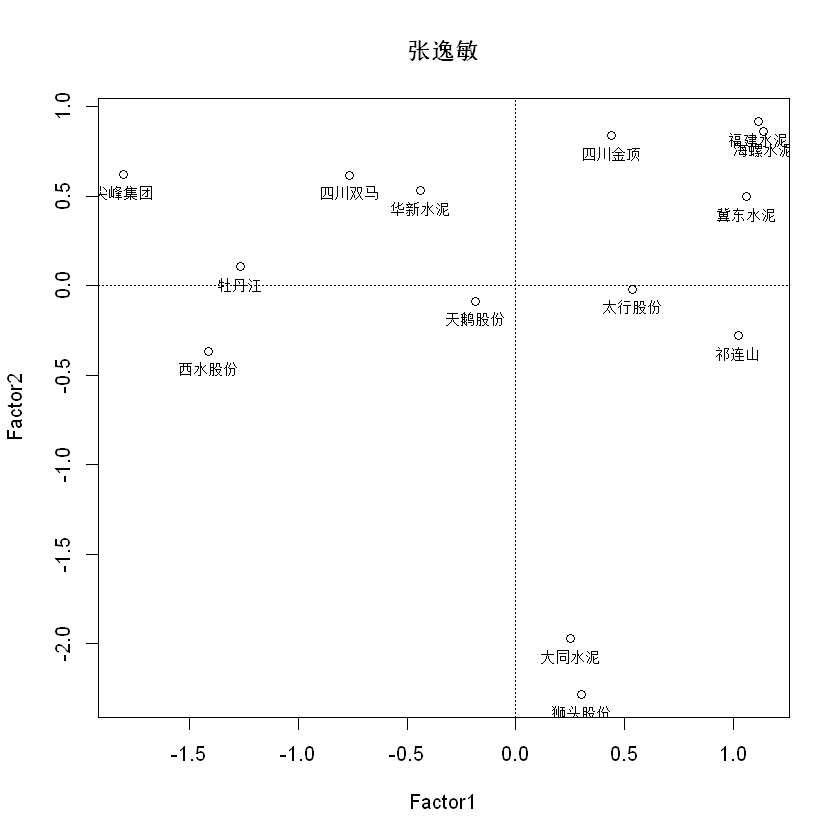

In [37]:
factanal.rank(Fa1,plot=T)

结果分析:①从因子得分表可以看出，在盈利能力因子$F_1$上得分最高的四个公司依次是海螺水泥、福建水泥、冀东水泥和祁连山，这四家公司的得分远高于其他公司，这说明就盈利能力而言，这四家公司的盈利水平远高于其他公司，而盈利能力相对较弱的公司是尖峰集团、西水股份和牡丹江。

②福建水泥、海螺水泥、四川金顶三家公司在因子$F_2$上的得分较高，说明在水泥行业中，这三家公司的偿债能力是较好的，而狮头股份和大同水泥这两家公司在因子$F_2$上的得分较低，则表明这两家的偿债能力相对较差，应着力提高。

③在发展能力因子$F_3$上，西水股份、海螺水泥的得分远远高于其他公司，反映在现实情况中，这两只股票从2008年到现在是稳中有升的，这也要得益于它们良好的发展能力。同时也说明在水泥行业上市公司中，就发展能力而言，好的公司还是少数,很多公司不注重长远稳健的发展，而只注重短期利润。这一点需要引起有关企业的注意。四川金顶在因子$F_3$上的得分最低，说明它的发展能力最差，并且它的前两个因子得分也不高，在综合排名上也是靠后的，因此这家公司应从企业内部着手，进行整改，要从整体上提高公司的各项经营能力，达到提升公司经营业绩的目的。

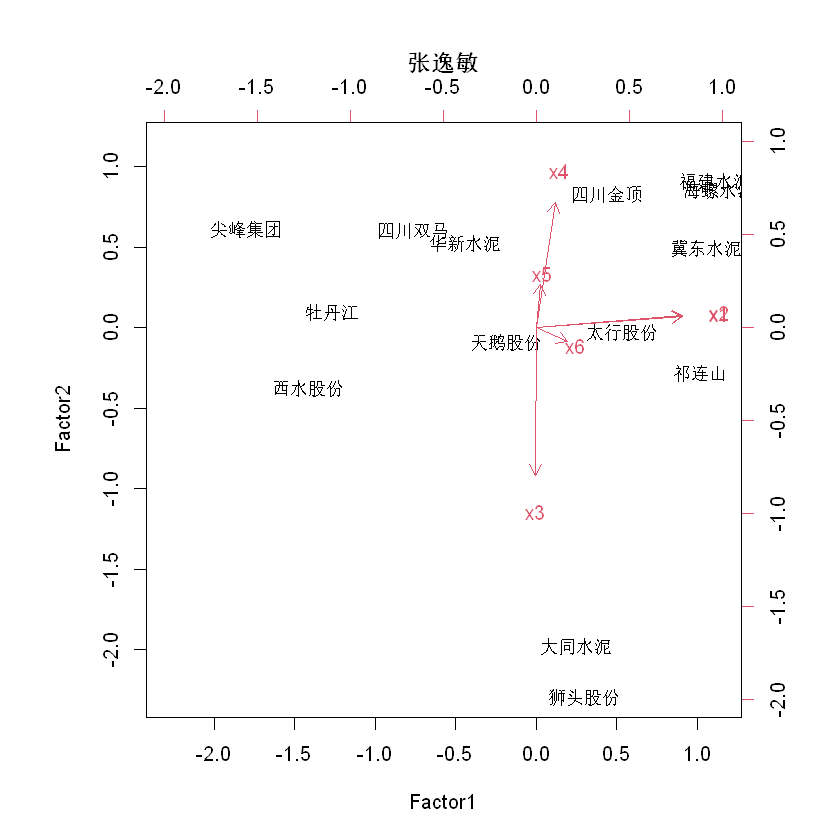

In [39]:
biplot(Fa1$scores,Fa1$loadings,main = "张逸敏") #前两个因子的信息重叠图

# 对31省市自治区的人均消费水平作分析评价

In [51]:
### Name: plot.text

### Aliases: plot.text
### Keywords: ~kwd1 ~kwd2

### ** Examples

##---- Should be DIRECTLY executable !! ----
##-- ==>  Define data, use random,
##--    or do  help(data=index)  for the standard data sets.

## The function is currently defined as
plot.text<-function(X,h=0,v=0)
{
   plot(X,main="张逸敏");abline(h=h,v=v,lty=3)
   text(X,label=rownames(X),pos=1.1,adj=0.5,cex=0.85) 
}

In [52]:
X=read.table("d7_2.txt")
Fac0=factpc(X,3)
Fac0$Vars

,Vars,Vars.Prop,Vars.Cum
Factor1,5.7012,0.71265,71.26
Factor2,1.0287,0.12858,84.12
Factor3,0.5043,0.06304,90.43


In [53]:
Fac1=factpc(X,3,rot="varimax") #旋转因子分析
Fac1$Vars


 Factor Analysis for Princomp in Varimax: 



,Vars,Vars.Prop,Vars.Cum
Factor1,4.016,50.20,50.20
Factor2,1.680,21.00,71.20
Factor3,1.538,19.22,90.43


由于公共因子在原始变量上的载荷值不太好解释，故对其进行因子旋转，选用方差最大化正交旋转，得到载荷矩阵如下所示

In [54]:
Fac0$loadings

,Factor1,Factor2,Factor3
X1,0.8429,-0.43524,0.12432
X2,0.5956,0.68671,0.37005
X3,0.8926,-0.09008,-0.05094
X4,0.7202,0.47829,-0.44596
X5,0.8979,-0.32885,0.08740
X6,0.9647,-0.07045,0.06403
X7,0.8858,-0.05691,-0.31385
X8,0.8939,0.12018,0.20046


In [55]:
Fac1$loadings

,Factor1,Factor2,Factor3
X1,0.9463,0.1159,0.08084
X2,0.1527,0.2499,0.93676
X3,0.7580,0.4145,0.24728
X4,0.2249,0.8743,0.36250
X5,0.9231,0.2125,0.15722
X6,0.8252,0.3638,0.35547
X7,0.6864,0.6337,0.11656
X8,0.6843,0.2980,0.54462


由旋转后的因子载荷矩阵可以看出，公共因子$F_1$在$X_1$(人均食品支出)、$X_3$(人均家庭设备用品及服务支出)、$X_5$(人均交通和通信支出)、$X_6$(人均娱乐教育文化服务支出)、$X_7$(人均居住支出)、$X_8$(人均杂项商品和服务支出）上的载荷值都很大，可视为反映日常消费的公共因子。

$F_2$在$X_4$(人均医疗保健支出）上的载荷值很大，可视为医疗因子。

$F_3$仅在$X_2$(人均衣着商品支出）上有很大的载荷，可直接视为衣着因子。

有了对各个公共因子合理的解释，结合各个省、市、自治区在三个公共因子上的得分和综合得分，就可以对各省、市、自治区的综合人均消费水平进行评价了。

In [56]:
Fac1$scores #因子得分

,Factor1,Factor2,Factor3
北京,1.18092,1.74118,2.0290303
天津,0.20460,2.96179,-0.7387309
河北,-0.92649,1.20877,-0.4632058
山西,-0.78973,0.43269,-0.0522166
内蒙古,-0.62006,-0.18964,2.1005492
辽宁,-0.51315,1.07679,-0.1140626
吉林,-1.04765,1.15843,0.4542682
黑龙江,-1.16020,0.29219,0.2627968
上海,3.25451,-0.50217,1.4096665
江苏,0.60518,0.14247,-0.2101378


In [57]:
Fac1$Rank #排名

,F,Ri
,<dbl>,<dbl>
北京,1.49132,2
天津,0.64435,5
河北,-0.33214,18
山西,-0.34907,20
内蒙古,0.05826,10
辽宁,-0.05908,11
吉林,-0.21606,13
黑龙江,-0.52041,29
上海,1.98992,1


在日常消费因子$F_1$上得分最高的前五个省、市依次是上海、北京、广东、浙江、天津，且上海和广东明显高于其他，这就是说就日常消费而言，沿海地区相对要高些，且上海和广东的消费水平远远高于其他省、市、自治区；而吉林和黑龙江在这方面的消费相对较小些。

天津、北京、河北、吉林和辽宁在因子$F_2$上的得分较高，可见该地区人们用于医疗保健方面的消费支出不小，西藏、贵州、江西和四川排到全国最末，这是符合实际情况的。

就衣着因子而言，西藏、北京、山东、新疆、青海这5个省、市、自治区的得分最高，得分较低的是广东、海南、广西。这说明衣着因子受气候的影响最大，北部、西北部省、市、自治区的人们为了御寒，因此在这方面的支出较多。

就综合得分来看，上海、北京、广东、浙江、天津这5个省、市的得分最高，河南、海南、江西省得分位于全国之末，故可知北京、上海、广东、浙江、天津这5个省、市的综合人均消费水平居于全国前列，云南、西藏和黑龙江的综合人均消费水平居于全国之末。

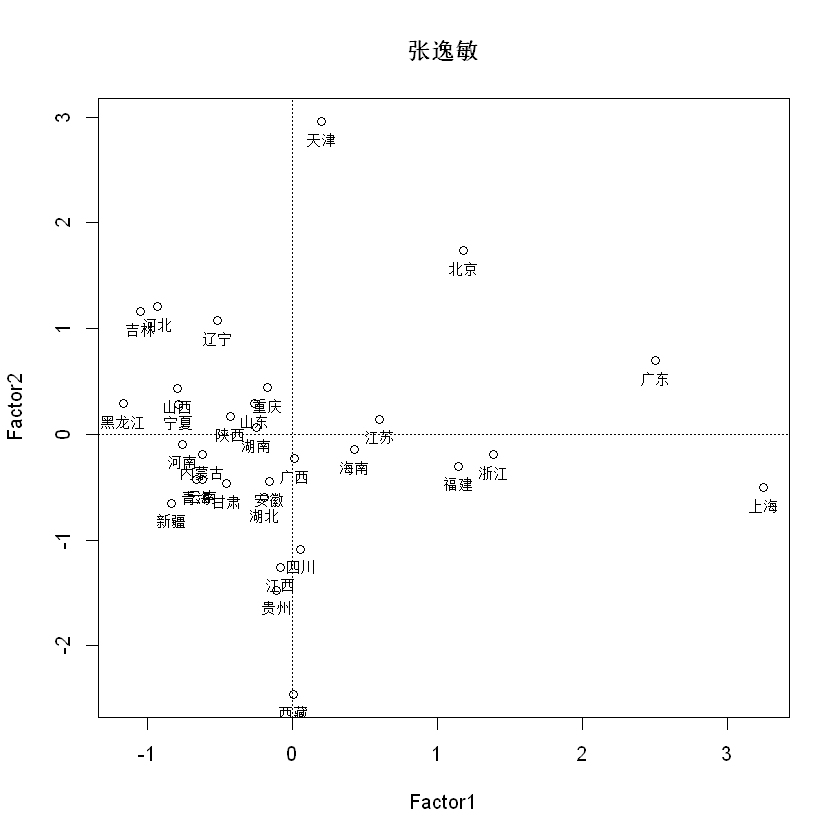

In [58]:
plot.text(Fac1$scores)

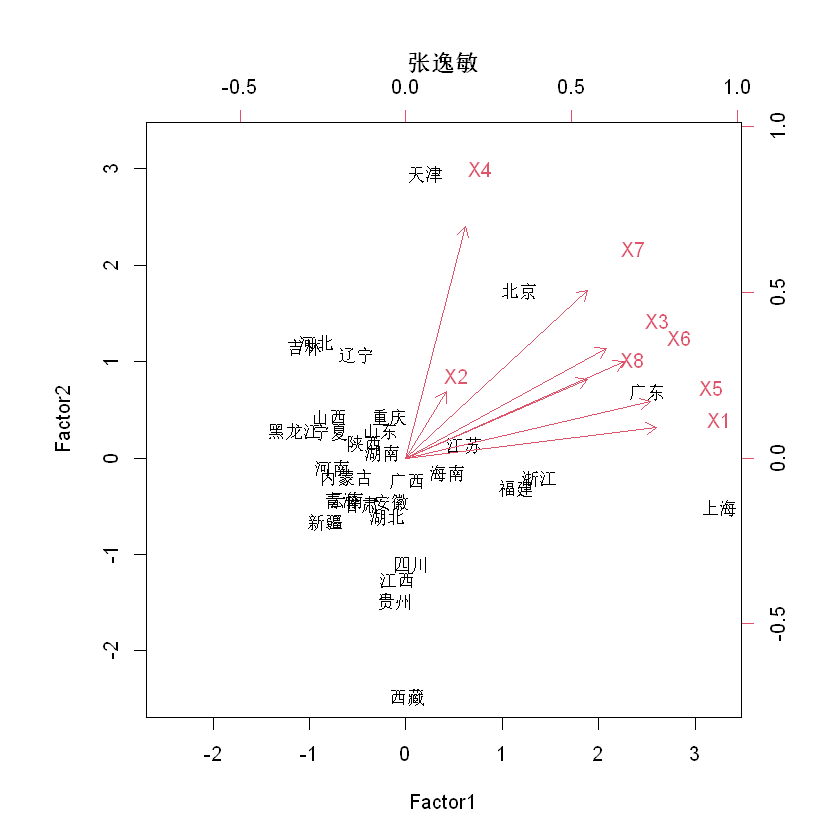

In [59]:
biplot(Fac1$scores,Fac1$loadings,main = "张逸敏")

从双重信息图上我们看到，各个变量在广东、上海、北京、天津这些地区的反应强烈，说明这些地区在各个指标消费都较高，广东人明显在变量$X_5$(人均交通和通信支出）上花的钱多于其他地区，而北京在变量$X_7$(人均居住支出）上花的钱较多。

# 因子分析在上市公司经营业绩评价中的应用

In [24]:
# 自编函数
### Name: factanal.rank

### Aliases: factanal.rank
### Keywords: ~kwd1 ~kwd2

### ** Examples

## ---- Should be DIRECTLY executable !! ----
## -- ==>  Define data, use random,
## --    or do  help(data=index)  for the standard data sets.

## The function is currently defined as
factanal.rank <- function(Fac, plot = F) {
   Fs <- Fac$scores
   W <- apply(Fac$loadings^2, 2, sum)
   Wi <- W / sum(W)
   F <- Fs %*% Wi
   # cat("\n"); print(cbind('F'=F[,1],'rank'=rank(-F[,1])))
   Ri <- data.frame("F" = F, "rank" = rank(-F))
   if (plot) {
      plot(Fs,main="张逸敏")
      abline(h = 0, v = 0, lty = 3)
      text(Fs, label = rownames(Fs), pos = 1.1, adj = 0.5, cex = 0.85)
   }
   # common=apply(Fac$loadings^2,1,sum);
   list(Fs = Fs, Ri = Ri)
} # Fac=factanal(X,2,rot="varimax",scores="regression")


In [14]:
Case9=read.table('case9.txt')
Case9

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
上海医药,0.330,3.65,8.93,0.2120,1.13,0.78,10.33,10.16,6.91,9.17,1.69
昆明制药,0.720,6.11,11.73,0.7124,2.23,1.92,55.37,54.63,3.19,3.61,0.78
片仔癀,0.430,3.88,11.14,0.4251,11.70,9.01,67.03,66.12,0.66,2.82,0.46
同仁堂,0.722,4.93,14.64,0.6954,2.54,1.08,47.38,46.14,1.15,2.92,0.83
天士力,0.500,3.91,12.67,0.4945,2.18,2.02,72.41,71.07,4.60,2.38,0.70
复星实业,0.648,4.34,14.94,0.6500,1.11,0.89,26.04,25.55,5.45,2.86,0.54
康美药业,0.723,6.25,11.57,0.7160,1.11,0.73,27.80,27.33,3.38,1.41,0.70
江中药业,0.350,4.12,8.42,0.3542,1.48,1.22,59.52,58.74,4.96,2.57,1.09
联环药业,0.187,4.09,4.58,0.1935,5.39,4.81,41.73,41.36,3.55,3.72,0.54



Call:
factanal(x = Case9, factors = 4, rotation = "none")

Uniquenesses:
   X1    X2    X3    X4    X5    X6    X7    X8    X9   X10   X11 
0.034 0.471 0.232 0.014 0.005 0.021 0.005 0.005 0.679 0.139 0.161 

Loadings:
    Factor1 Factor2 Factor3 Factor4
X1   0.933   0.305                 
X2   0.707   0.154                 
X3   0.813   0.320                 
X4   0.932   0.329                 
X5           0.699           0.711 
X6           0.706           0.689 
X7           0.942          -0.323 
X8           0.944          -0.318 
X9   0.221  -0.331   0.397         
X10  0.381           0.820   0.203 
X11  0.513  -0.139   0.746         

               Factor1 Factor2 Factor3 Factor4
SS loadings      3.371   3.225   1.398   1.244
Proportion Var   0.306   0.293   0.127   0.113
Cumulative Var   0.306   0.600   0.727   0.840

Test of the hypothesis that 4 factors are sufficient.
The chi square statistic is 76.41 on 17 degrees of freedom.
The p-value is 1.65e-09 

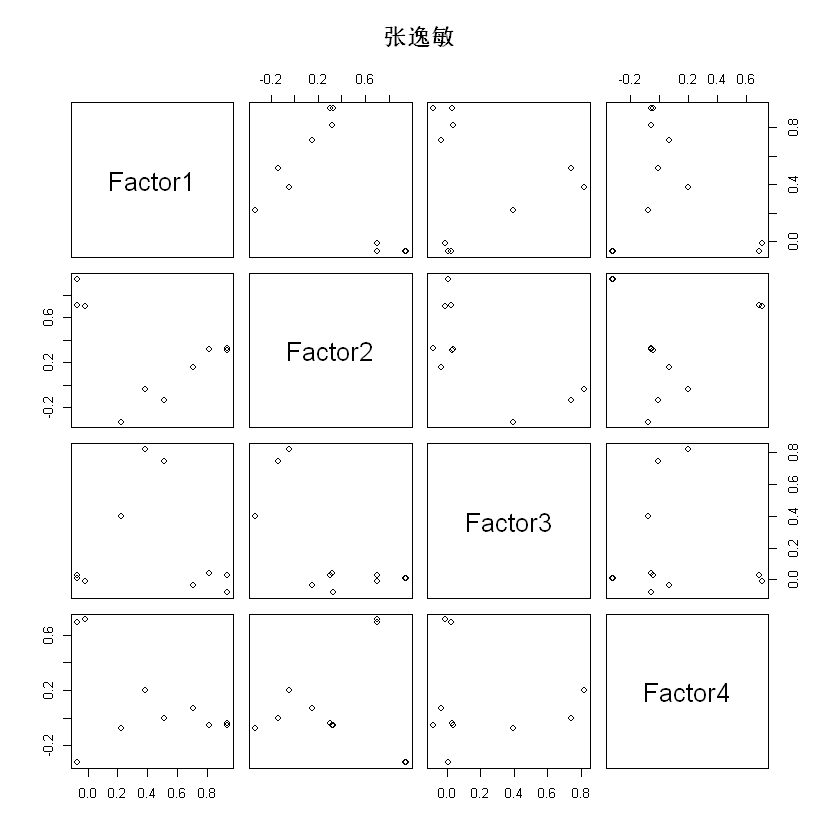

In [29]:
FA0=factanal(Case9,4,rotation="none") #因子不旋转  
FA0
pairs(FA0$loadings,main="张逸敏")


Call:
factanal(x = Case9, factors = 4, rotation = "varimax")

Uniquenesses:
   X1    X2    X3    X4    X5    X6    X7    X8    X9   X10   X11 
0.034 0.471 0.232 0.014 0.005 0.021 0.005 0.005 0.679 0.139 0.161 

Loadings:
    Factor1 Factor2 Factor3 Factor4
X1   0.950           0.123   0.212 
X2   0.713                   0.117 
X3   0.838           0.166   0.188 
X4   0.978           0.132   0.101 
X5   0.119   0.969   0.197         
X6           0.960   0.229         
X7   0.145   0.224   0.952  -0.144 
X8   0.145   0.229   0.950  -0.145 
X9          -0.235  -0.198   0.472 
X10  0.179   0.152           0.896 
X11  0.304                   0.857 

               Factor1 Factor2 Factor3 Factor4
SS loadings      3.258   2.061   2.008   1.911
Proportion Var   0.296   0.187   0.183   0.174
Cumulative Var   0.296   0.484   0.666   0.840

Test of the hypothesis that 4 factors are sufficient.
The chi square statistic is 76.41 on 17 degrees of freedom.
The p-value is 1.65e-09 

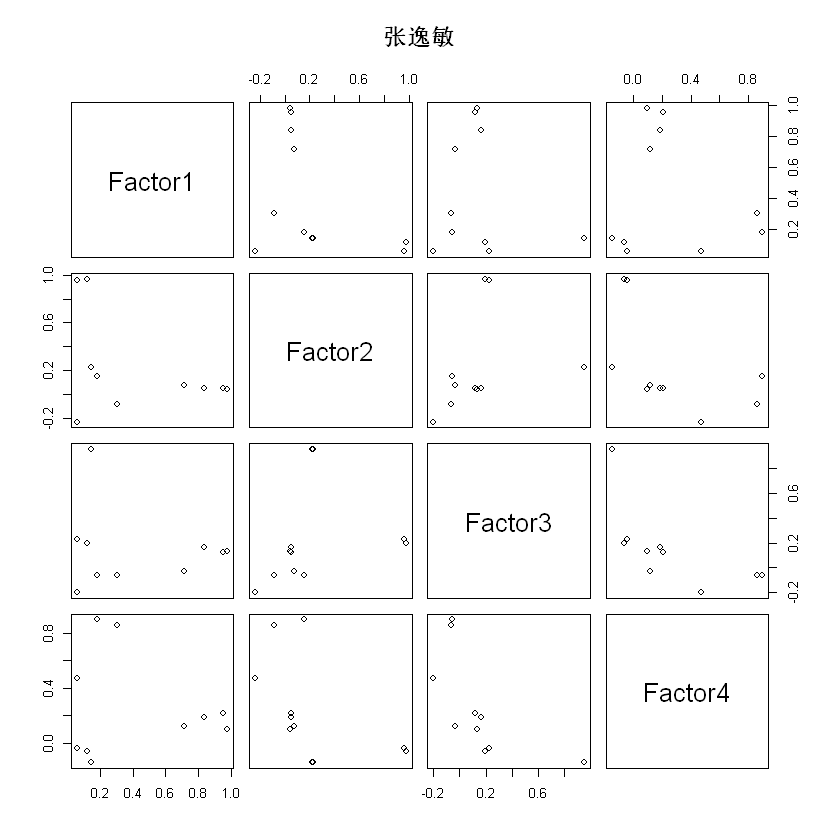

In [28]:
FA1=factanal(Case9,4,rot="varimax") #varimax法旋转
FA1
pairs(FA1$loadings,main="张逸敏")


Call:
factanal(x = Case9, factors = 4, scores = "reg", rotation = "varimax")

Uniquenesses:
   X1    X2    X3    X4    X5    X6    X7    X8    X9   X10   X11 
0.034 0.471 0.232 0.014 0.005 0.021 0.005 0.005 0.679 0.139 0.161 

Loadings:
    Factor1 Factor2 Factor3 Factor4
X1   0.950           0.123   0.212 
X2   0.713                   0.117 
X3   0.838           0.166   0.188 
X4   0.978           0.132   0.101 
X5   0.119   0.969   0.197         
X6           0.960   0.229         
X7   0.145   0.224   0.952  -0.144 
X8   0.145   0.229   0.950  -0.145 
X9          -0.235  -0.198   0.472 
X10  0.179   0.152           0.896 
X11  0.304                   0.857 

               Factor1 Factor2 Factor3 Factor4
SS loadings      3.258   2.061   2.008   1.911
Proportion Var   0.296   0.187   0.183   0.174
Cumulative Var   0.296   0.484   0.666   0.840

Test of the hypothesis that 4 factors are sufficient.
The chi square statistic is 76.41 on 17 degrees of freedom.
The p-value is 1.65e-09 

,Factor1,Factor2,Factor3,Factor4
上海医药,-0.38518626,0.04613094,-1.24733636,3.93721529
昆明制药,1.71680536,-0.27518683,0.88288661,0.37875758
片仔癀,0.48660099,4.43794736,0.60313696,-0.29474820
同仁堂,1.81318006,-0.14942738,0.25537445,0.07634029
天士力,0.70659547,-0.44578951,2.14645042,0.25163994
复星实业,1.80684006,-0.47774031,-1.07167379,-0.22125188
康美药业,2.13679913,-0.56399535,-1.04798943,-0.62156382
江中药业,0.12677693,-0.58965566,1.54856364,0.92279360
联环药业,-0.37520027,1.75742959,-0.14239324,0.47063184
交大昂立,-0.45733006,-0.06389830,0.78916821,0.66263607


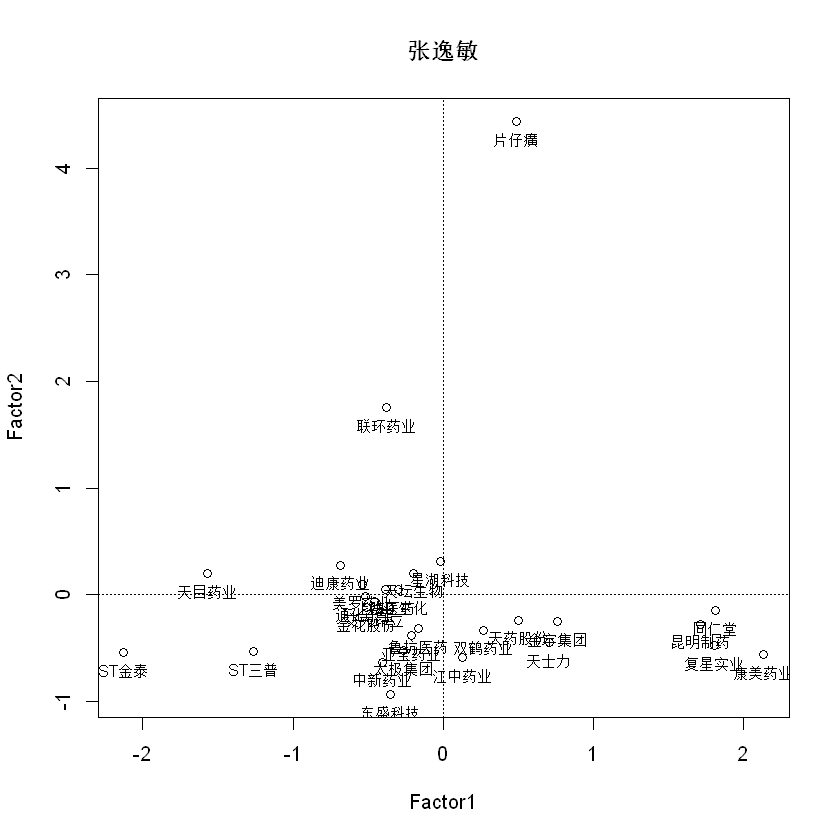

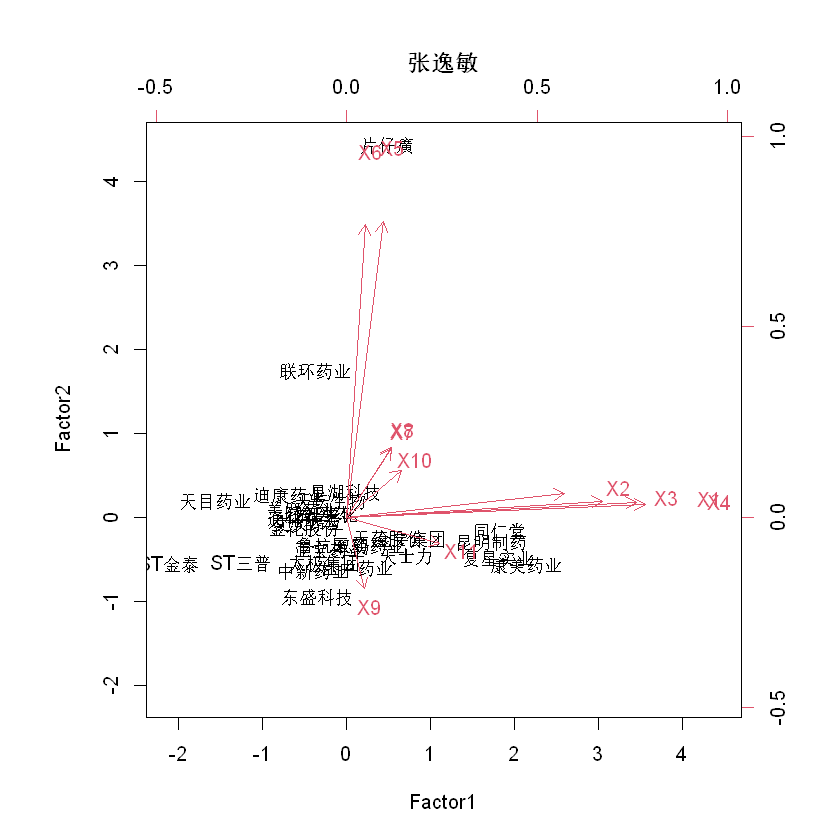

In [23]:
FA2=factanal(Case9,4,rot="varimax",scores = "reg")
FA2
factanal.rank(FA2,plot=T)
biplot(FA2$scores,FA2$loadings,main="张逸敏") #前2个因子信息重叠图

从方差贡献表中可以看到，前四个因子的累计方差贡献率达到$84\%$，所以只需要取前4个因子就可以较好地概括出原始指标。

由旋转后的因子载荷矩阵可以看出，因子$F_1$在每股收益$X_1$、每股净资产$X_3$、净资产收益率$X_4$、扣除后每股收益$X_4$上的载荷量较大，分别反映上市公司给予其股东的回报，在这个因子上得分越高，则公司能够给予股东的回报一般而言也越高。

因子$F_2$,由于在存货周转率$X_5$、固定资产周转率$X_6$上有较大的载荷量,所以是反映公司的资产管理能力的综合指标。

第三个因子$F_3$,在总资产周转率$X_7$、主营业务利润率$X_8$上的载荷量较大,主要体现了公司的短期偿债能力，是债权人非常关心的项目。

第四个因子$F_4$,在销售毛利率$X_9$、流动比率$X_{10}$、速动比率$X_{11}$上的载荷较大，是反映公司的盈利能力的公共因子。从R给出的成分图可以更清晰地看到各个原始指标之间的关系。

从因子排名表可以看到，在资产管理能力方面，片仔癀可谓一枝独秀。这与该公司独家生产和拥有400余年历史的名贵中药片仔癀不无关系。由于其独特的地位，所以漳州片仔癀集团公司的现金流相当充足。另外，片仔癀拥有的片仔癀配方属于国家秘密，因此在上市时没有进行资产评估，片仔癀的无形资产包括品牌、商标、技术、专利、药品批文等，都没有作评估就无偿进入股份公司，致使其在无形资产方面没有显示出应有的数据。这两方面的原因使得片仔癀在着重考察流动资产质量的短期偿债能力指标方面有着极为优秀的表现。

康美药业在股东回报方面领先，但是其他三个方面却都在平均水平以下，这与其特殊的股本结构和小盘股有着重要的联系。首先,翻看康美药业的年度报告就可以知道无论对整个资本市场还是对医药行业的上市公司而言，康美药业都属于小盘股;其次，康美药业属于典型的“家族企业”，公司的第一、二大股东关系密切，两者股权合计拥有超过$78\%$的公司股份。这两个原因使得尽管康美药业在其他方面表现平平,但是因为其没有一般上市公司的所有权和经营权分离所产生的矛盾，所以康美药业的股东可以享有较高的投资回报。